# VCS 3D Temperature Anomaly

This turorial illustrates using VCS (a CDAT tool) to plot a three dimensional temperature anomaly.

[Download the Jupyter Notebook](https://cdat.llnl.gov/Jupyter-notebooks/scientific/3D_Temperature_Anomaly/3D_Temp_Anomaly.ipynb)

[Download the Python file](https://cdat.llnl.gov/Jupyter-notebooks/scientific/3D_Temperature_Anomaly/3D_Temp_Anomaly.py)

The CDAT software was developed by LLNL and this notebook was created and the example code was updated on June 19, 2019. This work was performed under the auspices of the U.S. Department of Energy by Lawrence Livermore National Laboratory under Contract DE-AC52-07NA27344.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#To-Interact-with-the-3D-image..." data-toc-modified-id="To-Interact-with-the-3D-image...-1">To Interact with the 3D image...</a></span></li><li><span><a href="#Get-Tutorial-Data" data-toc-modified-id="Get-Tutorial-Data-2">Get Tutorial Data</a></span></li><li><span><a href="#Open-the-geos5-sample.nc-data-file" data-toc-modified-id="Open-the-geos5-sample.nc-data-file-3">Open the geos5-sample.nc data file</a></span></li><li><span><a href="#Initialize-the-VCS-canvas" data-toc-modified-id="Initialize-the-VCS-canvas-4">Initialize the VCS canvas</a></span></li><li><span><a href="#Set-dv3d-settings" data-toc-modified-id="Set-dv3d-settings-5">Set dv3d settings</a></span><ul class="toc-item"><li><span><a href="#Create-a-volume-plot" data-toc-modified-id="Create-a-volume-plot-5.1">Create a volume plot</a></span></li><li><span><a href="#Set-the-color-map" data-toc-modified-id="Set-the-color-map-5.2">Set the color map</a></span></li><li><span><a href="#Set-the-initial-camera-position" data-toc-modified-id="Set-the-initial-camera-position-5.3">Set the initial camera position</a></span></li><li><span><a href="#Choose-variable-to-plot" data-toc-modified-id="Choose-variable-to-plot-5.4">Choose variable to plot</a></span></li><li><span><a href="#Calculate-Volume-Average" data-toc-modified-id="Calculate-Volume-Average-5.5">Calculate Volume Average</a></span></li><li><span><a href="#Create-Volume-bounds" data-toc-modified-id="Create-Volume-bounds-5.6">Create Volume bounds</a></span></li></ul></li><li><span><a href="#Calculate-Final-3D-Temperature-Volume" data-toc-modified-id="Calculate-Final-3D-Temperature-Volume-6">Calculate Final 3D Temperature Volume</a></span></li><li><span><a href="#Create-the-3D-plot" data-toc-modified-id="Create-the-3D-plot-7">Create the 3D plot</a></span></li><li><span><a href="#Save-a-2D-image-of-the-3D-plot" data-toc-modified-id="Save-a-2D-image-of-the-3D-plot-8">Save a 2D image of the 3D plot</a></span></li></ul></div>

## To Interact with the 3D image... 
You will ultimately need to run the Python code in this notebook in a command line window, not within this notebook. One possible work flow is:
1. Step through this notebook line by line to make sure everything works (you are running an environment with the needed packages, the code is working for you with the sample data, etc.).
2. Once everything is working, either use the Python file we've provided above or save this notebook as a Python file by clicking on File (within the JupyterLab interface) > Export Notebook As... > Export Notebook to Executable Script.
3. Open a new command line window and activate your favorite CDAT environment (for testing this notebook, we used the [jupyter-vcdat environment after installing VCDAT](https://github.com/CDAT/jupyter-vcdat/wiki/Deploy). (Note: make sure you are using a "regular" version of the packages - NOT the mesalib version - since you will need to view the 3D image in a window that pops up once the Python script has been run.)
4. Navigate to where the Python script is stored and type: 
```
python -i 3D_Temp_Anomaly.py
```
at the prompt. 

A separate window should open where you can adjust the sliders and click on the "Configure" button to access more features of the plot. Click and drag on the center of the plot to change the angle at which you are viewing the data.

An alternate work flow is to accomplish all the steps above in a command line window without using JupyterLab or the Jupyter Notebook.

In [1]:
import vcs, cdms2, cdutil, genutil, sys

## Get Tutorial Data
Download many sample data files for all of our notebooks. For this exercise you need the goes5-sample.nc sample data file, the last one that is downloaded.

In [2]:
vcs.download_sample_data_files()

Downloading: 'BlueMarble.ppm' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/BlueMarble.ppm
Downloading: 'clt.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/clt.nc
Downloading: 'geo.1deg.ctl' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/geo.1deg.ctl
Downloading: 'geo.1deg.gmp' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/geo.1deg.gmp
Downloading: 'geo.1deg.grb' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/geo.1deg.grb
Downloading: 'meshfill.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/meshfill.nc
Downloading: 'navy_land.nc' from 'https://cdat.lln

Downloading: 'tas_ecm_1979.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/tas_ecm_1979.nc
Downloading: 'tas_cru_1979.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/tas_cru_1979.nc
Downloading: 'psl_6h.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/psl_6h.nc
Downloading: 'ts_da.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/ts_da.nc
Downloading: 'tas_mo.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/tas_mo.nc
Downloading: 'tas_mo_clim.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /Users/davis278/miniconda3/envs/nightly_mesa/share/cdat/sample_data/tas_mo_clim.nc
Downloading: 'tas_6h.nc' from 'https://cdat.

## Open the geos5-sample.nc data file

In [3]:
f=cdms2.open(vcs.sample_data+"/geos5-sample.nc")

## Initialize the VCS canvas

In [4]:
x = vcs.init()

## Set dv3d settings
Choose various dv3d settings for the type of plot you want to make.

In [5]:
dv3d = vcs.get3d_scalar()

### Create a volume plot

In [6]:
dv3d.ToggleVolumePlot = vcs.on

### Set the color map

In [7]:
dv3d.ScaleColormap = [-15.0, 15.0, 1] 

In [8]:
dv3d.ScaleTransferFunction =  [ 3.64, 24, 1]

In [9]:
dv3d.VerticalScaling = 6.0 

### Set the initial camera position
If you run the Python code version of this notebook, you can change the camera angle manually in the interactive plot by clicking and dragging the cursor.

In [10]:
dv3d.Camera={'Position': (-161, -171, 279), 'ViewUp': (.29, 0.67, 0.68), 'FocalPoint': (146.7, 8.5, -28.6)}

In [11]:
dv3d_v = vcs.get3d_scalar()   

### Choose variable to plot
Select the temperature (tmpu) variable from the open goes5-sample.nc file (f) and assign to the v0 variable.

In [12]:
v0 = f["tmpu"] 

### Calculate Volume Average
Average the temperature of the 3D volume over the x axis (the longitude) and assign to the variable, va.

In [13]:
va = cdutil.averager( v0, axis='x' )

### Create Volume bounds
Grow the volume from initial temperature values (v0) to the average temperature along the x axis (va) and assign the beginning and ending values as v01 and va1 respectively.

In [14]:
v01,va1=genutil.grower(v0,va)

## Calculate Final 3D Temperature Volume
Subtract the volume bounds from each other to create the volume, v.

In [15]:
v = v01 - va1

## Create the 3D plot
Note: when you run the following line, you can safely ignore the warning.
You should see the 3D plot after the line runs.

AREGSL: xyz


Warning, can't open data file 'None'


TYPEEEEEEEEP coastline
 build Volume Pipeline: range =  [-34.8010860443118, 24.015470886230446, -34.8010860443118, 0]
setVolRenderCfg
initCamera: Camera => ((-161.0, -171.0, 279.0), (146.7, 8.5, -28.6), (0.2906693100067274, 0.6715463369120944, 0.6815694165674988)) 


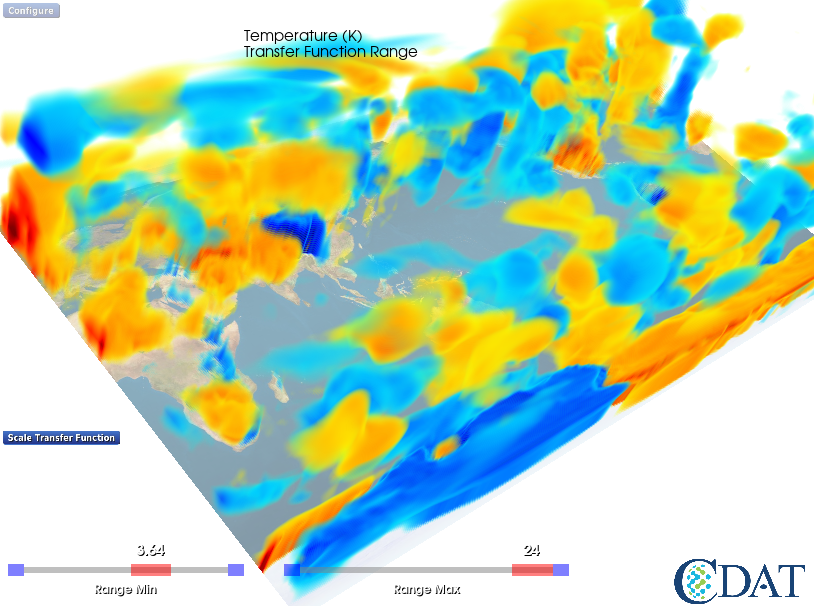

In [16]:
x.plot( v, dv3d )

## Save a 2D image of the 3D plot
The .png file will be in the same directory as this notebook, or the directory of the Python file if you ran the script direcly in a command line window.

In [17]:
x.png('temp_anomaly.png')